# ***Multi Linear Regression***

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')
Price: [13500 13750 13950 14950 12950 16900 18600 21500 20950 19950 19600 22500
 22000 22750 17950 16750 16950 15950 16250 17495 15750 15500 14750 19000
 15800 21950 20500 13250 15250 18950 15999 16500 18750 22250 12995 18450
 16895 14900 17250 15450 16650 17450 1645

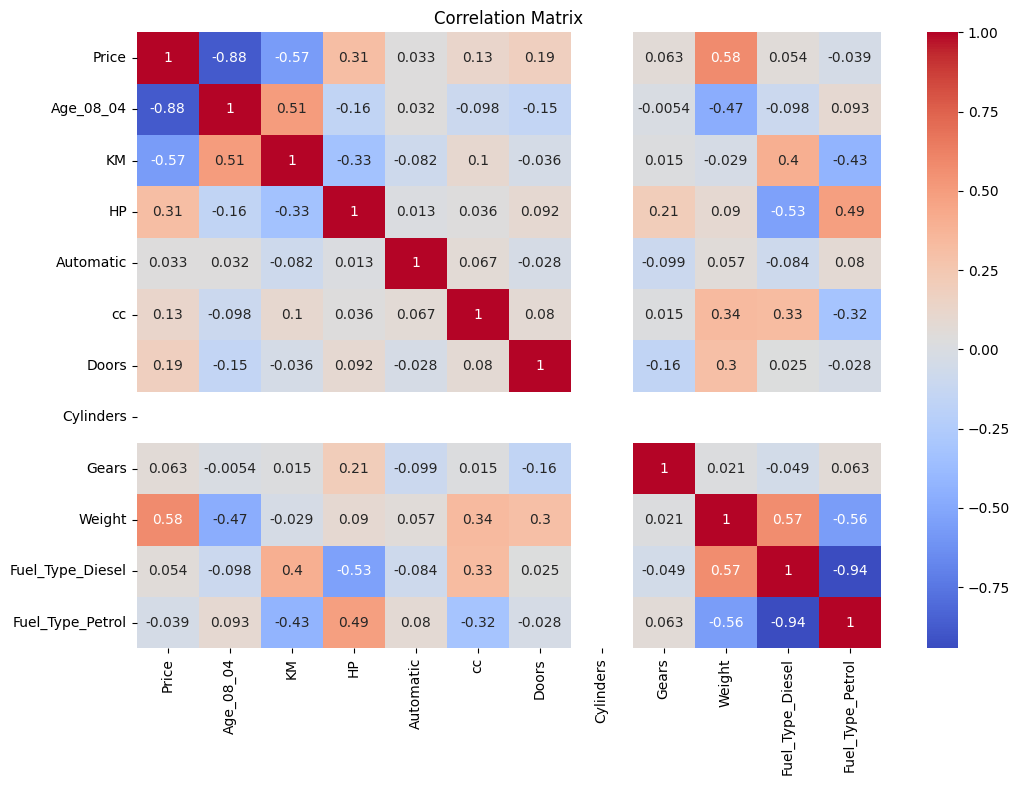

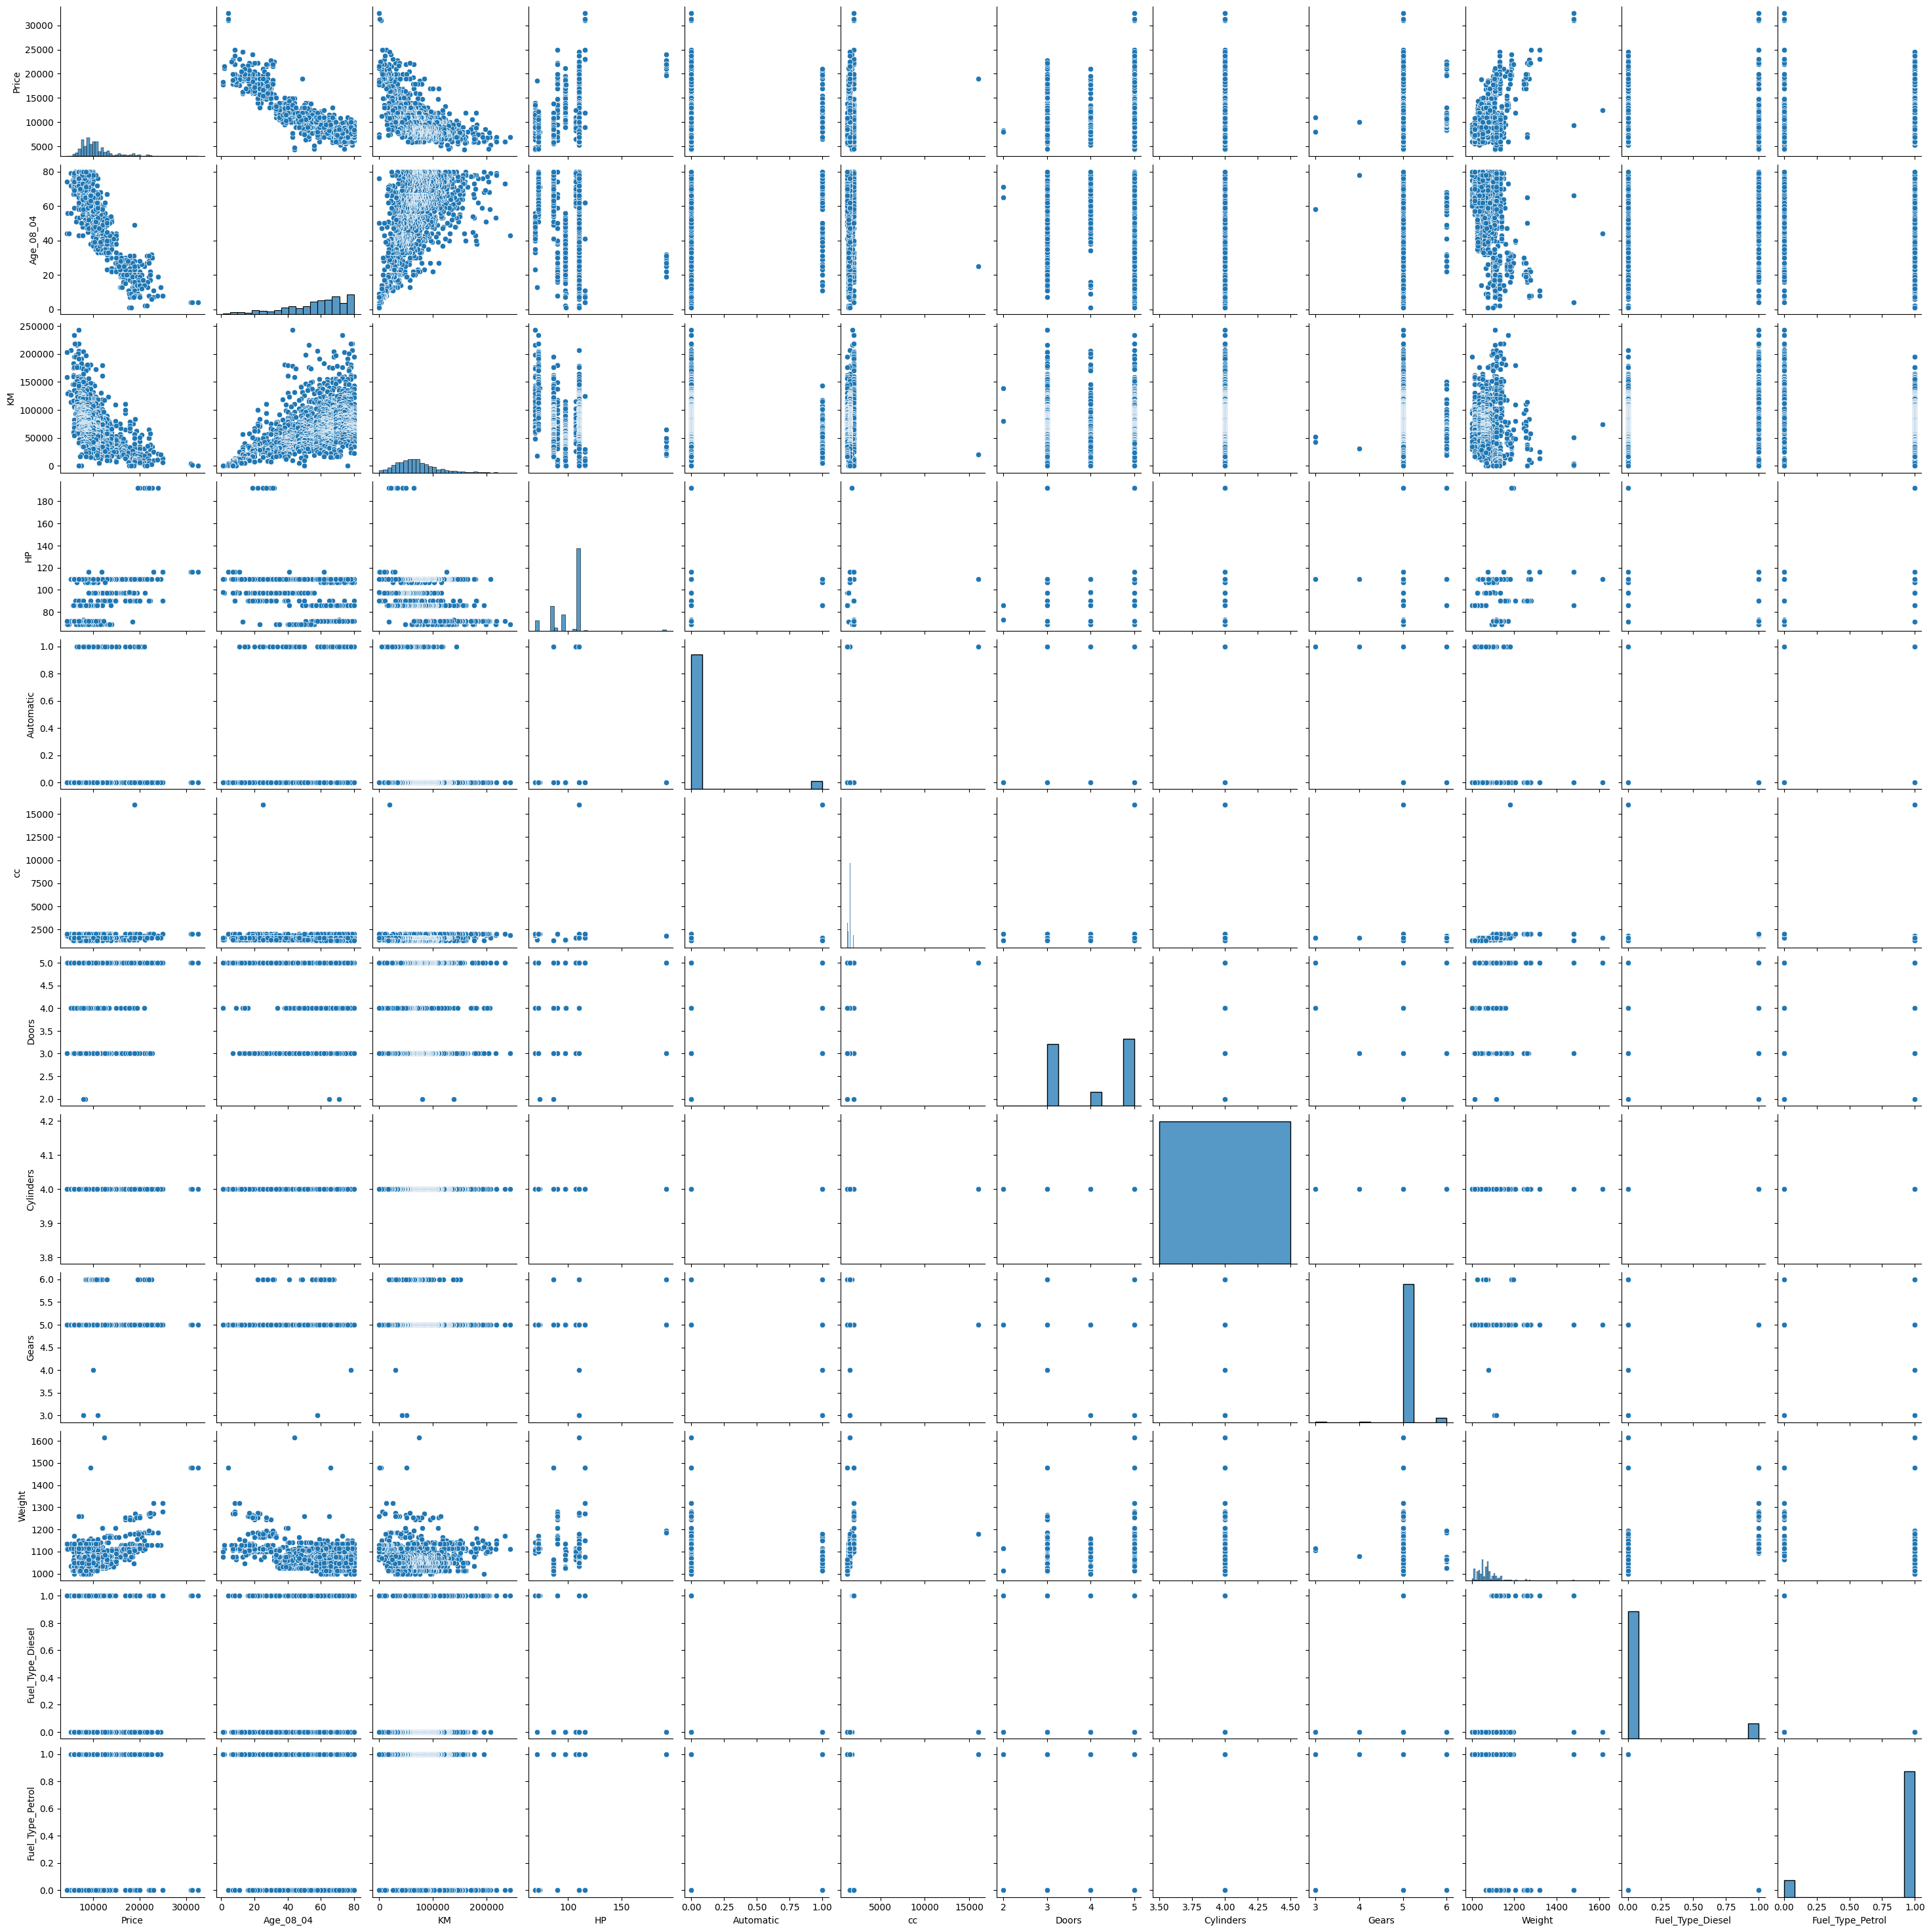

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/sample_data/ToyotaCorolla - MLR.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display the column names to check for all categorical columns
print(df.columns)

# List unique values of each column to identify non-numeric ones
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

# Convert all categorical variables to dummy variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the dataframe after encoding
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data types of each column
print(df.dtypes)

# Ensure all columns are numeric now
print("Are all columns numeric? ", all(pd.api.types.is_numeric_dtype(df[col]) for col in df.columns))

# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

In [5]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Build the multiple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficients of the model
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

# Model performance on the training set
y_train_pred = lr.predict(X_train)
print("Training R^2:", r2_score(y_train, y_train_pred))
print("Training RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))

Intercept: 10746.677976264662
Coefficients: [-2.24666244e+03 -6.08570564e+02  2.10253304e+02  3.41360751e+01
 -1.28850688e+01 -5.74368449e+01  2.84217094e-13  1.03946283e+02
  1.36213868e+03 -2.12708849e+01  4.45102711e+02]
Training R^2: 0.8702643169608926
Training RMSE: 1303.339622411835


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
# Model performance on the testing set
y_test_pred = lr.predict(X_test)
print("Testing R^2:", r2_score(y_test, y_test_pred))
print("Testing RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

Testing R^2: 0.834888804061108
Testing RMSE: 1484.2654153296521


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Model performance for Lasso and Ridge
y_test_pred_lasso = lasso.predict(X_test)
y_test_pred_ridge = ridge.predict(X_test)

print("Lasso Testing R^2:", r2_score(y_test, y_test_pred_lasso))
print("Lasso Testing RMSE:", mean_squared_error(y_test, y_test_pred_lasso, squared=False))

print("Ridge Testing R^2:", r2_score(y_test, y_test_pred_ridge))
print("Ridge Testing RMSE:", mean_squared_error(y_test, y_test_pred_ridge, squared=False))

Lasso Testing R^2: 0.8349119754675463
Lasso Testing RMSE: 1484.1612621141912
Ridge Testing R^2: 0.8350658145414693
Ridge Testing RMSE: 1483.469585020577


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
